In [1]:
import pandas as pd
import pytz, datetime
import pytz
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
path='datos2020/2020/'
datos= pd.read_csv(path+"DAT02-31_Marzo.csv", dtype={'Fecha': 'str','Hora(UTC)': 'str'})


In [3]:
mex=pd.DataFrame(datos)
mex['datetime']=pd.to_datetime(mex['Fecha'] +mex['Hora(UTC)'], format='%d%m%y%H%M%S')
mex.set_index(['datetime'],drop=True, inplace=True)

In [4]:
mex.head()

,Fecha,Hora(UTC),Coincidencias
datetime,,,
2020-03-01 00:00:42,010320,000042,85
2020-03-01 00:01:43,010320,000143,66
2020-03-01 00:02:43,010320,000243,89
2020-03-01 00:03:43,010320,000343,74
2020-03-01 00:04:43,010320,000443,89


In [5]:

flagMex=np.logical_and(mex.index>"2020-03-01",mex.index<"2020-03-08")

In [6]:
path='datos2021/'
filenamePy=path+'testflux.json'


In [7]:
py = pd.read_json (filenamePy, lines=True)
py['datetime']=pd.to_datetime(py.hora, unit='s',utc=True)
py.set_index(['datetime'],drop=True, inplace=True)
py= py.iloc[1:]
flagPy=np.logical_and(py.index>"2021-02-15",py.index<"2021-02-22")

In [8]:
py.head()

,_id,eficiencia,coincidencia,conteo,hora
datetime,,,,,
2021-02-15 15:21:34+00:00,{'$oid': '602a917e7e8f922df11be833'},0.953271,3.400000,408,1.613402e+09
2021-02-15 15:29:15.000000238+00:00,{'$oid': '602a934b5cf46e430314979a'},0.943262,3.325000,399,1.613403e+09
2021-02-15 15:31:15+00:00,{'$oid': '602a93c35cf46e4303149923'},0.939759,3.250000,390,1.613403e+09
2021-02-15 15:33:15+00:00,{'$oid': '602a943b5cf46e4303149ae6'},0.963597,3.750000,450,1.613403e+09
2021-02-15 15:35:15+00:00,{'$oid': '602a94b35cf46e4303149c89'},0.950450,3.516667,422,1.613403e+09


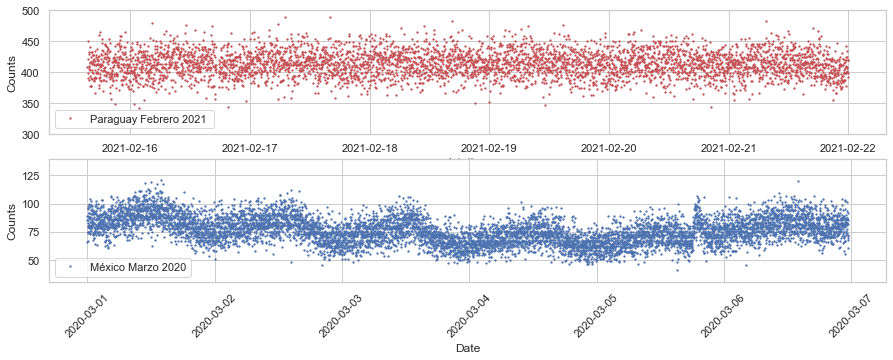

In [21]:
fig, axes = plt.subplots(2,1, figsize=(15,5), sharex=True)
plt.subplot(211)

axes =py['conteo'][flagPy].plot(marker='.',markersize=2.5, ylim=(300,500),linestyle='None',legend=True,  label='Paraguay Febrero 2021 ',alpha=1,color='r', subplots=True)
ax = plt.gca()
ax.set_ylabel('Counts')
plt.subplot(212)
axes =mex['Coincidencias'][flagMex].plot(marker='.',markersize=2.5, ylim=(30,140),linestyle='None',legend=True,  label='México Marzo 2020',alpha=1,color='b', subplots=True)
ax = plt.gca()
ax.set_ylabel('Counts')
ax.set_xlabel('Date')
plt.xticks(rotation = 45)
plt.savefig('EscaramujovsParaguay.png')

In [14]:
from scipy import signal

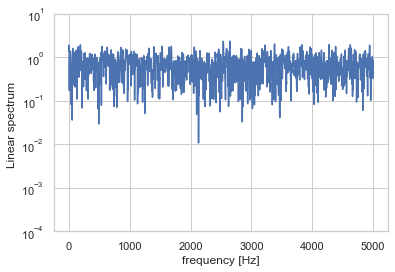

In [22]:
fs = 10e3
f, Pxx_spec = signal.periodogram(py['conteo'][flagPy], fs, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.ylim([1e-4, 1e1])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum ')
plt.show()

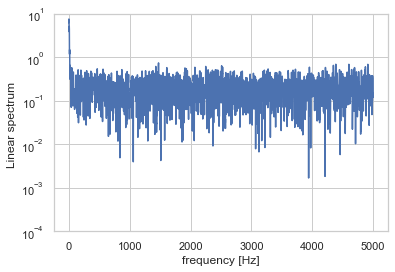

In [23]:
fs = 10e3
f, Pxx_spec = signal.periodogram(mex['Coincidencias'][flagMex], fs, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.ylim([1e-4, 1e1])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum ')
plt.show()